> # **(Uma Breve) Introdução à Ciência de Dados e Aprendizado de Máquina em Python** 
> ## 1° Encontro GruPy Jundiaí - FATEC Jundiaí - 13/04/2019

>
>
>
>
>
>
>
>

#### **Rodolfo Camargo de Freitas** - rodolfo.camargo.freitas@gmail.com
#### __[Github](https://github.com/rc-freitas)__ - __[Linkedin](https://www.linkedin.com/in/rodolfo-camargo-de-freitas-166551b0)__

# **0. Pacotes**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# **1. Carregando os dados**
### __[Iris data set](https://archive.ics.uci.edu/ml/datasets/iris)__

In [3]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('./data/iris.data', names=features)

Três maneiras de visualizar os dados rapidamente: _head_, _tail_ e _sample_.

In [ ]:
#iris.head()
#iris.tail(10)
#iris.sample(10)

> **Fatiamento de dados**

Temos várias opções e combinações possiveis para extrair e mesmo modificar partes específicas dos dados.

In [4]:
iris[0:3]
#iris['sepal_length']
#iris[['sepal_length', 'petal_length']][0:3]
#iris[iris['class']=='Iris-virginica']

#iris.loc[0:3]
#iris.loc[0:3, ['sepal_length', 'petal_length']]
#iris.loc[iris['class']=='Iris-virginica', ['sepal_length', 'petal_length', 'class']]

#iris.iloc[:3, [1,3,4]]

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


> **Informações básicas**

Informações sobre o conjunto dos dados: índices, # de colunas, # de objetos não nulos e tipo para cada coluna e espaço na memória.

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Informações estatísticas básicas

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Algumas figuras valem por quantas tabelas?

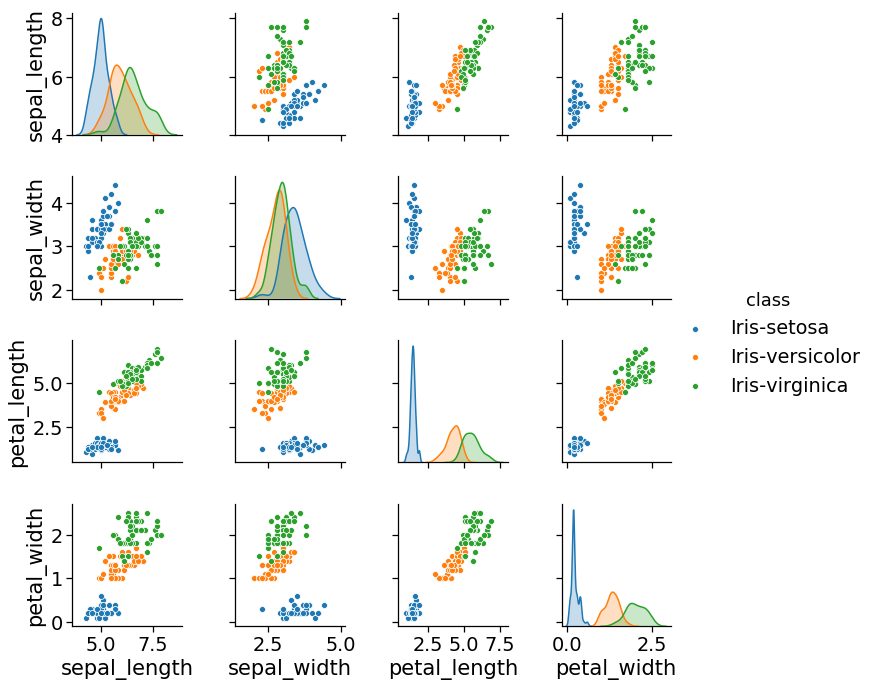

In [4]:
sns.set_context('notebook', font_scale=1.75)

g = sns.pairplot(data=iris, hue='class')

# **2. Limpeza dos dados**

Apenas criando um conjunto de dados com menor qualidade: valores nulos (_NaN_).

In [5]:
iris_nan = iris.copy()

for _ in range(10):
    x = np.random.randint(150)
    y = np.random.randint(4)
    iris_nan.iloc[x,y] = np.NaN

Econtrando e eliminando os valores nulos.

In [9]:
iris_nan.isna().any(axis=1)

#iris_nan[iris_nan.isna().any(axis=1)]

#iris_nan.dropna(inplace=True)

#iris_nan[iris_nan.isna().any(axis=1)]

0       True
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14      True
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142     True
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

Substituindo os valores nulos.

In [16]:
iris_fill = iris_nan.fillna(0)
#iris_fill[(iris_fill==0).any(axis=1)]
#iris_fill[iris_fill.isna().any(axis=1)]

#medias = iris_nan.mean().to_dict()

#iris_fill = iris_nan.fillna(medias)
#iris_fill[iris_fill.isna().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.0,3.5,1.4,0.2,Iris-setosa
14,5.8,4.0,1.2,0.0,Iris-setosa
21,0.0,3.7,1.5,0.4,Iris-setosa
55,5.7,2.8,0.0,1.3,Iris-versicolor
68,6.2,0.0,4.5,1.5,Iris-versicolor
83,6.0,2.7,5.1,0.0,Iris-versicolor
87,6.3,0.0,4.4,1.3,Iris-versicolor
107,7.3,0.0,6.3,1.8,Iris-virginica
115,6.4,0.0,5.3,2.3,Iris-virginica
142,5.8,2.7,0.0,1.9,Iris-virginica


# **3. Pré-processamento**

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

Separando medidas (X) das classes (y).

In [18]:
X, y = iris.iloc[:, :4], iris.iloc[:,4]

### **3.1. _Transformando os dados_**

Escalonando meus dados: $\mu$=0 e $\sigma$=1

In [19]:
scaler_mean = StandardScaler()

scaler_mean.fit(X)
print(scaler_mean.mean_)

X_scaled = scaler_mean.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=iris.columns[:4])
X_scaled['class'] = y

[5.84333333 3.054      3.75866667 1.19866667]


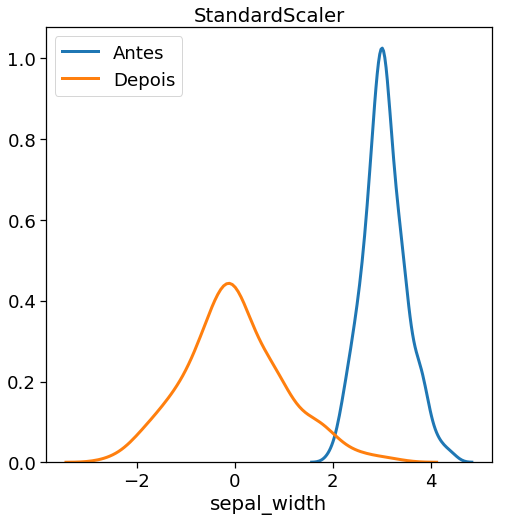

In [20]:
sns.set_context('notebook', font_scale=1.65)
plt.figure(figsize=(8,8))
sns.distplot(iris.loc[:,'sepal_width'], hist=False, label='Antes', kde_kws={"lw": 3})
sns.distplot(X_scaled.loc[:,'sepal_width'], hist=False, label='Depois', kde_kws={"lw": 3})
plt.title('StandardScaler')

plt.show()

In [21]:
X_scaled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


Comparandos outras opções

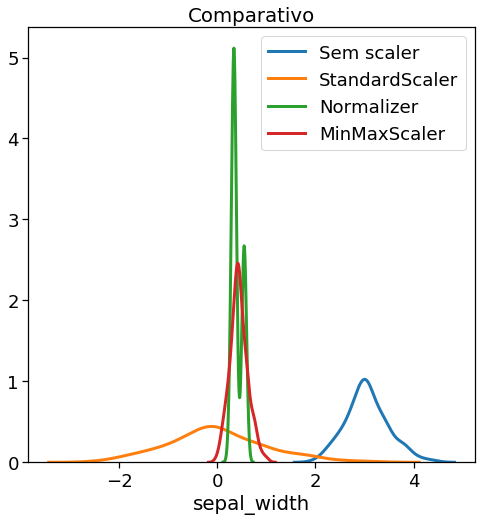

In [22]:
sns.set_context('notebook', font_scale=1.65)

scalers_dict = {'StandardScaler':StandardScaler(), 'Normalizer': Normalizer(), 'MinMaxScaler':MinMaxScaler()}

plt.figure(figsize=(8,8))
sns.distplot(iris.loc[:,'sepal_width'], hist=False, label='Sem scaler', kde_kws={"lw": 3})

for scaler_label, scaler in scalers_dict.items():
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=iris.columns[:4])
    X_scaled['class'] = y
    
    sns.distplot(X_scaled.loc[:,'sepal_width'], hist=False, label=scaler_label, kde_kws={"lw": 3})
    
plt.title('Comparativo')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

Classificadores só entendem números

In [24]:
encoder = LabelEncoder()

encoder.fit(y)

encoder.classes_
y_encoded = encoder.transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **3.2. _Principal Component Analysis (PCA)_**

In [25]:
from sklearn.decomposition import PCA

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca = PCA()
#X_pca = pca.fit_transform(X_scaled)

#pca.explained_variance_ratio_

#iris_pca = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4'])
#iris_pca['class'] = y

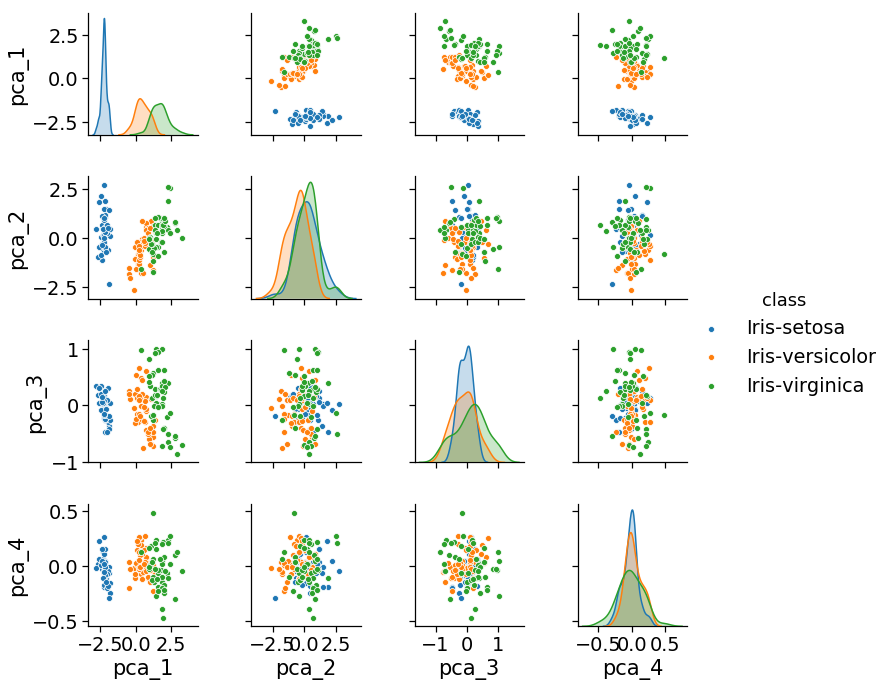

In [28]:
sns.set_context('notebook', font_scale=1.75)

g = sns.pairplot(data=iris_pca, hue='class')

In [29]:
X, y = X_pca, y_encoded

# **4. Aprendizado de Máquina**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### **4.1. _Classificação supervisionada: Ávores de decisão_**

In [32]:
from sklearn.tree import DecisionTreeClassifier

Treinando um modelo simples...

In [33]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

... e fazendo previsões

In [34]:
y_predicted = clf.predict(X_test)
y_predicted[:10]

print(encoder.inverse_transform(y_predicted[:10]))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


> ### O que é uma árvore de decisão?

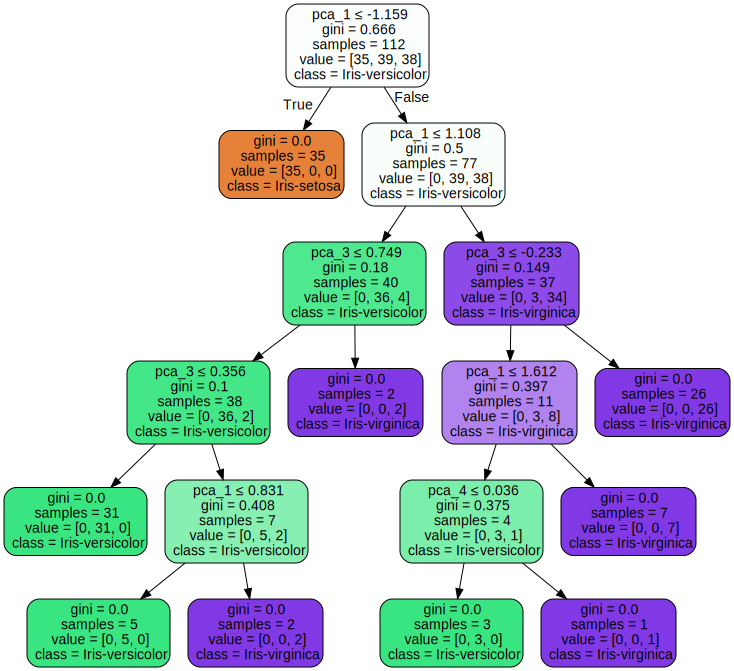

In [35]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris_pca.columns[:4],
                           class_names=np.unique(iris['class']),
                           filled=True, rounded=True,
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### **4.2. _Avaliação do modelo_**

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Percentual de acertos

In [37]:
print('Precisão de {:2.3f}% \n'.format(100*accuracy_score(y_test, y_predicted)))
print(classification_report(y_test, y_predicted, target_names=encoder.classes_))

Precisão de 97.368% 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

      micro avg       0.97      0.97      0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



A (confusa) matriz de confusão

In [38]:
cf_m = confusion_matrix(y_test, y_predicted)
print(cf_m)

[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


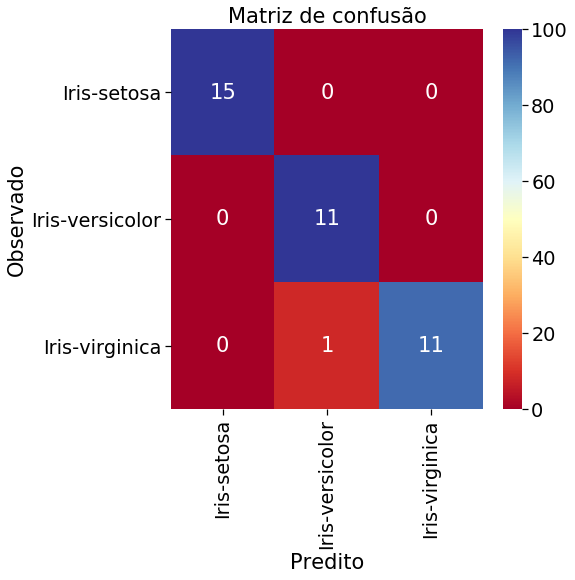

In [40]:
rel_m = 100*(cf_m.astype('float') / cf_m.sum(axis=1)[:, np.newaxis])

plt.figure(figsize=(7,7))
plt.title('Matriz de confusão')
sns.heatmap(rel_m, 
            annot=cf_m,
            cmap='RdYlBu',
            xticklabels=encoder.classes_, 
            yticklabels=encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.show()

# **5. Sugestões para exploração**

> ### 1. - Treinar e testar o modelo sem PCA;
> ### 2. - Treinar e testar o modelo eliminando NaN's (com e sem PCA);
> ### 3. - Treinar e testar o modelo substituindo NaN's pela média (com e sem PCA);
> ### 4. - Explorar __[outros](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)__ algoritmos de classificação;